## 구글 드라이브 마운트

In [4]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


## 데이터 위치지정

In [5]:
# Data file 
url = 'https://public.roboflow.com/ds/eL4QUdkpSR?key=0ikL5WLM1w'
# ProjectName
pName='mask2'


# Base folder Path
# bPath = '/content/yolo/'
bPath = '/content/drive/MyDrive/yolo/'

# Data file Path
dPath = bPath + pName+'/'  

# Working folder Path
wPath = bPath + "yolov5/"



## 폴더 생성, Yolov5 clone

In [6]:
# !rm -rf /content/drive/MyDrive/yolo/*

![ ! -d {bPath} ] && mkdir {bPath}
![ ! -d {dPath} ] && mkdir {dPath}
%cd {bPath}
![ ! -d {wPath} ] && git clone https://github.com/nowage/yolov5



/content/drive/MyDrive/yolo


## Yolov5 환경 설정

In [7]:
!pip uninstall -y imgaug
# !pip uninstall -y PyYAML

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9


- yolo가 설치된 폴더로 이동

In [8]:
%cd {wPath}

/content/drive/MyDrive/yolo/yolov5


- requirements.txt 파일로 필요라이브러리 설치

In [9]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 7.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Library Loading

In [10]:
from os.path import join,isfile,isdir
import pandas as pd
import numpy as np


## 데이터셋 다운로드

- roboflow 데이터셋 다운로드

In [11]:
datapath = bPath+pName+'/data.yaml'

if not isdir(dPath+"train/"):
  %cd {dPath}
  !curl -L "{url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip    
  !cat {datapath}|sed "s/\.\./\.\.\/{pName}/g" >/tmp/data.yaml
  !mv /tmp/data.yaml {datapath}
else:
  print('기존 Data file 사용')
  %cd {dPath}
  !ls {dPath}



기존 Data file 사용
/content/drive/MyDrive/yolo/mask2
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# Train

## Train 실행

- yolov5 폴더 이동

In [12]:
%cd {wPath}

/content/drive/MyDrive/yolo/yolov5


- train 파일을 임포트하여 훈련

In [13]:
# # print(datapath)
# !cat {datapath}
# print(wPath+'models/yolov5s.pt')
# !ls /content/drive/MyDrive/yolo/yolov5/models/

In [14]:
# datapath = '../'+pName+'/data.yaml'
# !pwd
# !ls {datapath}

In [15]:
import train
train.run(data=datapath, 
          imgsz=416, 
          batch=16, 
          epochs=50, 
          weights=wPath+'models/yolov5s.pt', 
          name=pName
)


  0%|          | 0.00/755k [00:00<?, ?B/s]

train: weights=/content/drive/MyDrive/yolo/yolov5/models/yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolo/mask2/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=mask2, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100, batch=16
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/drive/MyDrive/yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 v5.0-442-g41db904 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)


Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]             

Plotting labels... 


Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/train/mask22
Starting training for 50 epochs...

     Epoch   gpu_mem       box       obj       cls    labels  img_size



autoanchor: Analyzing anchors... anchors/target = 5.71, Best Possible Recall (BPR) = 0.9986


      0/49     1.64G     0.123   0.04699   0.02941        93       416: 100%|██████████| 7/7 [00:12<00:00,  1.84s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


                 all         29        162     0.0057     0.0493    0.00227   0.000438



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      1/49     1.73G    0.1199   0.05106   0.02896       115       416: 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


                 all         29        162     0.0055     0.0423    0.00247   0.000487



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      2/49     1.73G    0.1171   0.05747   0.02831        76       416: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


                 all         29        162    0.00657     0.0211    0.00243   0.000538



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      3/49     1.73G    0.1145   0.06703   0.02744       122       416: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


                 all         29        162    0.00759     0.0423    0.00255   0.000533



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      4/49     1.73G    0.1123   0.06289   0.02628        83       416: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


                 all         29        162    0.00666     0.0352    0.00262   0.000503



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      5/49     1.73G    0.1113   0.07633   0.02561       100       416: 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


                 all         29        162    0.00956     0.0673    0.00311   0.000561



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      6/49     1.73G    0.1075   0.06452   0.02479        92       416: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


                 all         29        162     0.0111     0.0743    0.00418   0.000801



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      7/49     1.73G    0.1064   0.07437   0.02399       133       416: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


                 all         29        162    0.00903      0.117    0.00475   0.000865



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      8/49     1.73G    0.1047   0.07792   0.02284        99       416: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


                 all         29        162     0.0111      0.134    0.00667    0.00139



     Epoch   gpu_mem       box       obj       cls    labels  img_size
      9/49     1.73G    0.1032   0.07311   0.02201       108       416: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


                 all         29        162     0.0197      0.131      0.011    0.00233



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     10/49     1.73G   0.09776   0.07969   0.02231       101       416: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


                 all         29        162     0.0263      0.233     0.0157     0.0033



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     11/49     1.73G   0.09797   0.07697   0.02131       112       416: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


                 all         29        162     0.0393      0.198     0.0299    0.00569



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     12/49     1.73G   0.09465   0.07903   0.02171       117       416: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


                 all         29        162     0.0638      0.148     0.0475    0.00966



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     13/49     1.73G   0.09252   0.07139   0.02047       120       416: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


                 all         29        162     0.0999       0.13     0.0691     0.0138



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     14/49     1.73G   0.08917   0.06611   0.01915        89       416: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


                 all         29        162      0.122      0.151     0.0904     0.0184



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     15/49     1.73G   0.08587   0.06633   0.01866       145       416: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


                 all         29        162      0.651       0.13      0.109     0.0252



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     16/49     1.73G   0.08366   0.06415   0.01702        72       416: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


                 all         29        162      0.623      0.194       0.12     0.0327



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     17/49     1.73G   0.07998   0.06629   0.01808        63       416: 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


                 all         29        162      0.655      0.148      0.121     0.0314



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     18/49     1.73G   0.07759   0.06442    0.0179       163       416: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


                 all         29        162      0.695      0.175      0.141     0.0293



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     19/49     1.73G   0.07261   0.05864   0.01719       132       416: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


                 all         29        162      0.667      0.183      0.131     0.0301



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     20/49     1.73G   0.07356   0.06344   0.01826        84       416: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


                 all         29        162      0.703      0.232      0.182     0.0503



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     21/49     1.73G   0.07163   0.06265    0.0188       105       416: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


                 all         29        162      0.732      0.232      0.205     0.0653



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     22/49     1.73G   0.06855   0.05375    0.0156        89       416: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


                 all         29        162      0.761      0.246      0.254     0.0838



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     23/49     1.73G   0.06547   0.05774   0.01753        71       416: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


                 all         29        162      0.773      0.243      0.304      0.086



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     24/49     1.73G    0.0764   0.06005   0.01705       146       416: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


                 all         29        162      0.796      0.246      0.312     0.0888



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     25/49     1.73G   0.06842    0.0552   0.01638        98       416: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


                 all         29        162      0.614       0.42      0.312     0.0994



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     26/49     1.73G   0.06761   0.05764   0.01675       199       416: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


                 all         29        162      0.354      0.485      0.356      0.115



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     27/49     1.73G   0.06329   0.05659   0.01574        95       416: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


                 all         29        162      0.628       0.43       0.35      0.109



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     28/49     1.73G   0.06498   0.05743    0.0186       104       416: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


                 all         29        162      0.625      0.427      0.342      0.109



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     29/49     1.73G   0.06648   0.05487   0.01618       121       416: 100%|██████████| 7/7 [00:11<00:00,  1.66s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


                 all         29        162      0.209      0.526      0.332      0.103



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     30/49     1.73G   0.06426   0.05682   0.01752       131       416: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


                 all         29        162      0.235       0.53      0.369      0.135



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     31/49     1.73G   0.06218   0.05573   0.01587       161       416: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


                 all         29        162      0.471       0.43      0.354       0.13



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     32/49     1.73G   0.06161   0.05143   0.01732       120       416: 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


                 all         29        162      0.787      0.296      0.335      0.132



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     33/49     1.73G   0.05861   0.05222   0.01727       117       416: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


                 all         29        162      0.243      0.515      0.353      0.127



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     34/49     1.73G   0.05929   0.05309   0.01583       132       416: 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


                 all         29        162      0.836      0.295      0.359      0.151



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     35/49     1.73G   0.06609   0.06115   0.01381       234       416: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


                 all         29        162      0.228      0.515      0.333      0.134



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     36/49     1.73G    0.0595   0.05274   0.01552        81       416: 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


                 all         29        162      0.869       0.31      0.392      0.179



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     37/49     1.73G   0.05384   0.05138   0.01548       104       416: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


                 all         29        162      0.794      0.282      0.314      0.115



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     38/49     1.73G   0.05838    0.0525   0.01608       146       416: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


                 all         29        162      0.848      0.299      0.371      0.176



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     39/49     1.73G   0.05886   0.05245   0.01474       128       416: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


                 all         29        162       0.81      0.299      0.364       0.15



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     40/49     1.73G   0.05647   0.05479    0.0171       134       416: 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


                 all         29        162       0.83      0.348        0.4      0.184



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     41/49     1.73G    0.0548   0.05056   0.01695       164       416: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


                 all         29        162      0.853      0.338      0.402        0.2



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     42/49     1.73G   0.05285   0.04777   0.01571        72       416: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


                 all         29        162      0.829      0.373       0.41      0.205



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     43/49     1.73G   0.05289   0.05888    0.0185       243       416: 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


                 all         29        162      0.847      0.334      0.401      0.192



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     44/49     1.73G   0.05281   0.05459   0.01814       193       416: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


                 all         29        162      0.323      0.494      0.424      0.219



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     45/49     1.73G   0.05515   0.04828   0.01676        62       416: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


                 all         29        162      0.288      0.494      0.419      0.207



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     46/49     1.73G   0.05141   0.04631   0.01626        98       416: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


                 all         29        162      0.297      0.503      0.427      0.209



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     47/49     1.73G   0.05273   0.05344   0.01693        88       416: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


                 all         29        162      0.873      0.352      0.416       0.21



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     48/49     1.73G   0.05145   0.05453   0.01489        77       416: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


                 all         29        162      0.884      0.348       0.42      0.214



     Epoch   gpu_mem       box       obj       cls    labels  img_size
     49/49     1.73G   0.05067   0.04957   0.01486        99       416: 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


                 all         29        162      0.805      0.352      0.378      0.179
                mask         29        142       0.61      0.704      0.641        0.3
             no-mask         29         20          1          0      0.115     0.0582



50 epochs completed in 0.140 hours.


Optimizer stripped from runs/train/mask22/weights/last.pt, 14.3MB
Optimizer stripped from runs/train/mask22/weights/best.pt, 14.3MB


Results saved to runs/train/mask22


# Detect

## 세팅

- torch 모델을 읽기 위해 import

In [16]:
import torch

## path 설정

In [17]:
!ls {mPath}

ls: cannot access '{mPath}': No such file or directory


In [18]:

mPath=wPath+'runs/train/'+pName+'/weights/best.pt'


## 직접 만든 모델 load

In [60]:
print(wPath,mPath)

model = torch.hub.load(wPath, 'custom', path=mPath, source='local') 

/content/drive/MyDrive/yolo/yolov5/ /content/drive/MyDrive/yolo/yolov5/runs/train/mask2/weights/best.pt
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v5.0-442-g41db904 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)




requirements: 1 package updated per /content/drive/MyDrive/yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Image 를 불러와서 test

In [50]:
iPath=dPath+'test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.jpg'  
# %cd {wPath}

# from glob import glob

# img_list = glob(join(dPath,'valid/images/*.jpg'))

# print(len(img_list))

In [51]:
%cd /content
imgs = [iPath]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()
results.show()

image 1/1: 630x1200 5 masks
Speed: 26.0ms pre-process, 15.8ms inference, 2.3ms NMS per image at shape (1, 3, 352, 640)


/content


### results 를 imshow 로 확인하는 법

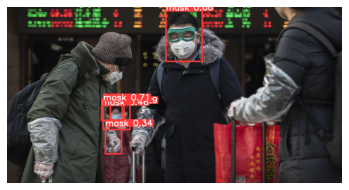

In [52]:
%matplotlib inline
from matplotlib.pyplot import imread,imshow,subplots,axis,title
# ir=plt.imread('~~imgName~~')
# title('~~Title~~') 
axis("Off")
imshow(results.imgs[0])

# 직접 바운딩박스 그리기

In [53]:
## Package install

In [54]:
!pip install imgaug

## 좌표값 확인

In [55]:
print('\n', results.xyxy[0][0])  # print img1 predictions


 tensor([344.76559, 335.85934, 440.85934, 438.51559,   0.71094,   0.00000], device='cuda:0')


## import 

In [56]:
%matplotlib inline
import imageio
import imgaug as ia
import pandas as pd

## original 이미지 확인

Original:


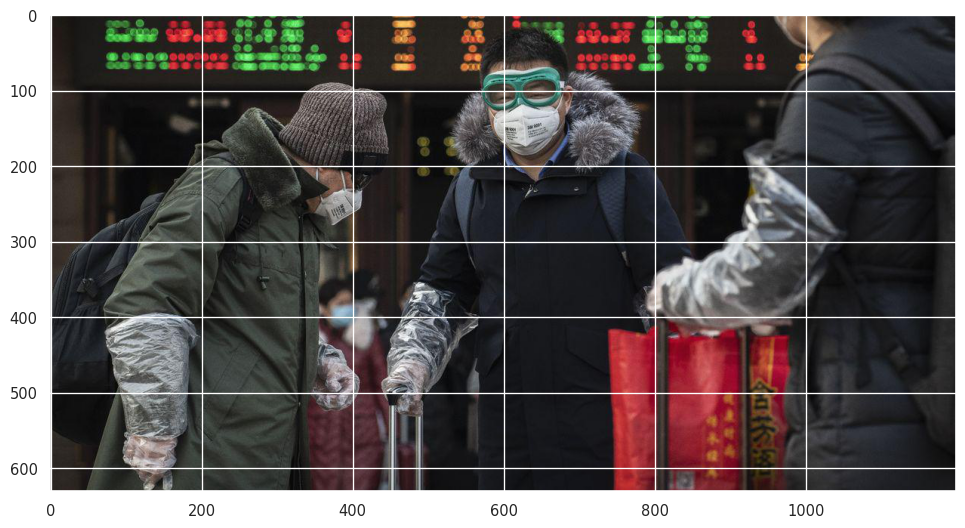

In [57]:
image = imageio.imread(iPath)

print("Original:")
ia.imshow(image)

## 바운딩박스를 그리는 함수 만들기

In [58]:

def bbsOnImage(img,bs):

    bbs = ia.BoundingBoxesOnImage(bs, shape=img.shape)

    image_with_bbs = bbs.draw_on_image(img)

    # image_with_bbs = ia.BoundingBox(
    #     x1=50.5, y1=10.5, x2=100.5, y2=16.5
    # ).draw_on_image(image_with_bbs, color=(255, 0, 0), size=3)
    return image_with_bbs

## 바운딩박스 그리기

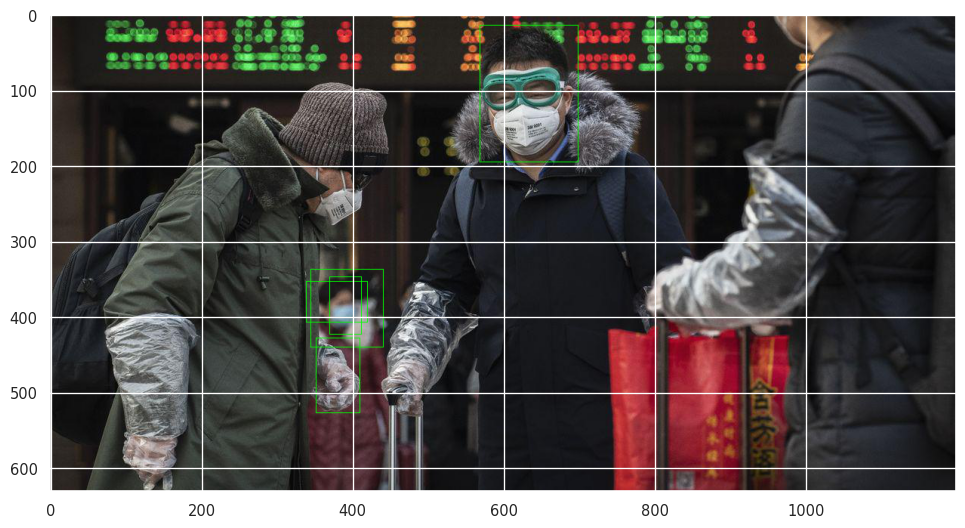

In [59]:
timage = image
for i in results.xyxy :
  for t in i :
    x1re = float(t[0])
    x2re = float(t[2])
    y1re = float(t[1])
    y2re = float(t[3])
    bs=[
      ia.BoundingBox(x1=x1re, y1=y1re, x2=x2re, y2=y2re)
    ]
    timage = bbsOnImage(timage,bs)
ia.imshow(timage)